## Introduction :

Au cours de ses dernières années, tout le monde a remarqué une augmentation vertigineuse des prix des biens et des services, une perte du pouvoir d’achat des ménages et une dépréciation de l'euro face au dollars américain, partout en Europe et plus précisément en France. 

Ce phénomène due à plusieurs changements dans la sphère politique et économique mondiale, est appelé l’inflation. C’est pour cela, on a voulu étudier et analyser l’inflation en France entre 1990 et 2024 et essayer de trouver des explications à ces changements.

# Dans l’optique de réaliser ce travail, on s’est basé sur 6 data bases (trouvées sur le site de l’INSEE) :

+ df_1 : Indice_prix_consommation_90_24.csv : Ce fichier contient les indices de prix à la consommation hors tabac pour la période qui s’étend du 01/01/1990 au 01/12/2023.
+ df_2 : Indice_prix_consommation_90_24_alimentation.csv : Ce fichier contient les indices de prix à la consommation – produit alimentaire entre 01/01/1990 et 01/12/2023.
+ df_3 : Indice_prix_consommation_90_24_energie.csv : Ce fichier contient les indices de prix à la consommation – énergie entre 01/01/1990 et 01/12/2023. 
+ df_4 : Indice_prix_consommation_90_24_produit_manufacturé.csv : Ce fichier contient les indices de prix à la consommation – produits manufacturés du 01/01/1990 au 01/12/2023.
+ df_5 : Taux d'inflation annuel.xlsx : Ce fichier contient les taux d’inflation annuel en France entre 1991 et 2023.
+ df_6 : prc_hicp_midx_page_tabular.tsv : Ce fichier contient les indices de prix à la consommation harmonisé de plusieurs pays entre janvier 2019 et décembre 2023.


# Partie 01 : Importation, Nettoyage, préparation et visualisation des données :
## 1-	Phase d’importation :


In [1]:
#Importation des packages necessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import statsmodels.api as sm
import seaborn as sns

In [2]:
#Importation des données 
Directory_path = r"C:\Users\DELL\OneDrive\Bureau\py2"
df_1 = pd.read_csv(os.path.join(Directory_path, "Indice_prix_consommation_90_24.csv"), sep = ";") #Ce fichier contient les indices de prix à la consommtion totale hors tabac
df_2 = pd.read_csv(os.path.join(Directory_path, "Indice_prix_consommation_90_24_alimentation.csv"), sep = ";") #Ce fichier contient les indice de prix à la consommation pour les produits alimentaire
df_3 = pd.read_csv(os.path.join(Directory_path, "Indice_prix_consommation_90_24_energie.csv"), sep = ";") #Ce fichier contient les indices de prix à la consommation de l'énergie
df_4 = pd.read_csv(os.path.join(Directory_path, "Indice_prix_consommation_90_24_produit_manufacturé.csv"), sep = ";") #Ce fichier contient les indice de prix à la consommation pour les produits manufacturés
df_5 = pd.read_excel(os.path.join(Directory_path, "Taux d'inflation annuel.xlsx")) #Ce fichier contient les taux d'inflation général en France
df_6 = pd.read_csv(os.path.join(Directory_path, "prc_hicp_midx_page_tabular.tsv"), delimiter = "\t")

## 2-	Phase de nettoyage et de préparation :
+ On a commencé par sélectionner les données dont lesquelles on aurait besoin pour la réalisation de l’analyse et on a supprimer le reste.
+ On a aussi renommé les colonnes qu’on a gardé. 
+ Ensuite, on a fusionné les 4 premières data frame, qui contiennent les indices mensuels de prix à la consommation générale hors tabac, alimentaire, de l’énergie et des produits manufacturés dans une seule data frame appelée « IPC_df ».
+ Par la suite, on a opéré une vérification de la composition de « IPC_df », pour vérifier que la date est sous format Datetime et les indices sous format numérique (flotteur) (voir figure 04 en annexe), ce qui n’était pas le cas, donc on a exécuté une conversion des variables.
+ Puis, à partir de la data frame « IPC_df », on a créé une nouvelle data frame nommée « IPC_df_annuelle », qui contient les taux d’inflation annuel hors tabac, alimentaire, énergétique et des produits manufacturés de la France entre 1991 et 2023. 
+ Ensuite, on a créé aussi une data frame appelée « IPC_df_mensuelle » à partir de « IPC_df », qui contient les taux d’inflation mensuel hors tabac, alimentaire, énergétique et des produits manufacturés de la France entre 1990 et 2023. 

In [3]:
#Visualisons la composition des data base
display(df_1.info())
display(df_2.info())
display(df_3.info())
display(df_4.info())
display(df_5.info())
#Visualisons les data frame
display(df_1)
display(df_2)
display(df_3)
display(df_4)
display(df_5)
#Dans chaque df, on va garder les colonnes Date et indice et on va supprimer le reste. On va supprimer aussi les 3 premiéres lignes
#Ensuite on rennomer les colonnes
df_1.drop(columns = ["Codes", "Unnamed: 3"], axis = 1, inplace = True)
df_2.drop(columns = ["Codes"], axis = 1, inplace = True)
df_3.drop(columns = ["Codes"], axis = 1, inplace = True)
df_4.drop(columns = ["Codes"], axis = 1, inplace = True)
df_1.drop([0, 1, 2], inplace = True)
df_2.drop([0, 1, 2], inplace = True)
df_3.drop([0, 1, 2], inplace = True)
df_4.drop([0, 1, 2], inplace = True)
df_5.drop([33, 34, 35, 36], inplace = True)
#On va réinitialiser les index
df_1.reset_index(drop = True, inplace = True)
df_2.reset_index(drop = True, inplace = True)
df_3.reset_index(drop = True, inplace = True)
df_4.reset_index(drop = True, inplace = True)
#On va rennomer les colonnes
df_1.rename(columns = {"Libellé" : "Date", "Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Ensemble hors tabac" : "indice hors tabac"}, inplace = True)
df_2.rename(columns = {"Libellé" : "Date", "Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Alimentation" : "indice alimentation"}, inplace = True)
df_3.rename(columns = {"Libellé" : "Date", "Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Énergie" : "indice énergie"}, inplace = True)
df_4.rename(columns = {"Libellé" : "Date", "Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Produits manufacturés" : "indice produit manufacturés"}, inplace = True)
df_5.rename(columns = {"Année" : "date"}, inplace = True)
df_5.info()
#Visualisons les data frame
display(df_1)
display(df_2)
display(df_3)
display(df_4)
display(df_5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 4 columns):
 #   Column                                                                                               Non-Null Count  Dtype 
---  ------                                                                                               --------------  ----- 
 0   Libellé                                                                                              411 non-null    object
 1   Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Ensemble hors tabac  410 non-null    object
 2   Codes                                                                                                408 non-null    object
 3   Unnamed: 3                                                                                           409 non-null    object
dtypes: object(4)
memory usage: 13.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 3 columns):
 #   Column                                                                                        Non-Null Count  Dtype 
---  ------                                                                                        --------------  ----- 
 0   Libellé                                                                                       411 non-null    object
 1   Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Alimentation  410 non-null    object
 2   Codes                                                                                         408 non-null    object
dtypes: object(3)
memory usage: 9.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 3 columns):
 #   Column                                                                                   Non-Null Count  Dtype 
---  ------                                                                                   --------------  ----- 
 0   Libellé                                                                                  411 non-null    object
 1   Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Énergie  410 non-null    object
 2   Codes                                                                                    408 non-null    object
dtypes: object(3)
memory usage: 9.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 3 columns):
 #   Column                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                 --------------  ----- 
 0   Libellé                                                                                                411 non-null    object
 1   Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Produits manufacturés  410 non-null    object
 2   Codes                                                                                                  408 non-null    object
dtypes: object(3)
memory usage: 9.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Année             37 non-null     object 
 1   Taux d'inflation  33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 724.0+ bytes


None

,Libellé,Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Ensemble hors tabac,Codes,Unnamed: 3
0,idBank,1763852,NaN,NaN
1,Dernière mise à jour,12/04/2024 08:45,NaN,NaN
2,Période,NaN,NaN,Date de parution au JO
3,1990-01,68.09,A,01/03/1990
4,1990-02,68.23,A,30/03/1990
...,...,...,...,...
406,2023-08,118.0,A,16/09/2023
407,2023-09,117.37,A,14/10/2023
408,2023-10,117.54,A,16/11/2023
409,2023-11,117.33,A,16/12/2023


,Libellé,Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Alimentation,Codes
0,idBank,1759963,NaN
1,Dernière mise à jour,12/04/2024 08:45,NaN
2,Période,NaN,NaN
3,1990-01,67.57,A
4,1990-02,67.72,A
...,...,...,...
406,2023-08,131.29,A
407,2023-09,130.92,A
408,2023-10,130.97,A
409,2023-11,131.47,A


,Libellé,Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Énergie,Codes
0,idBank,1759967,NaN
1,Dernière mise à jour,12/04/2024 08:45,NaN
2,Période,NaN,NaN
3,1990-01,52.06,A
4,1990-02,51.83,A
...,...,...,...
406,2023-08,157.99,A
407,2023-09,161.12,A
408,2023-10,160.3,A
409,2023-11,158.53,A


,Libellé,Indice des prix à la consommation - Base 2015 - Ensemble des ménages - France - Produits manufacturés,Codes
0,idBank,1759966,NaN
1,Dernière mise à jour,12/04/2024 08:45,NaN
2,Période,NaN,NaN
3,1990-01,91.96,A
4,1990-02,92.13,A
...,...,...,...
406,2023-08,104.54,A
407,2023-09,105.26,A
408,2023-10,105.43,A
409,2023-11,105.47,A


,Année,Taux d'inflation
0,2023,4.9
1,2022,5.2
2,2021,1.6
3,2020,0.5
4,2019,1.1
5,2018,1.8
6,2017,1.0
7,2016,0.2
8,2015,0.0
9,2014,0.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              33 non-null     object 
 1   Taux d'inflation  33 non-null     float64
dtypes: float64(1), object(1)
memory usage: 660.0+ bytes


,Date,indice hors tabac
0,1990-01,68.09
1,1990-02,68.23
2,1990-03,68.4
3,1990-04,68.78
4,1990-05,68.89
...,...,...
403,2023-08,118.0
404,2023-09,117.37
405,2023-10,117.54
406,2023-11,117.33


,Date,indice alimentation
0,1990-01,67.57
1,1990-02,67.72
2,1990-03,67.72
3,1990-04,68.57
4,1990-05,68.57
...,...,...
403,2023-08,131.29
404,2023-09,130.92
405,2023-10,130.97
406,2023-11,131.47


,Date,indice énergie
0,1990-01,52.06
1,1990-02,51.83
2,1990-03,51.69
3,1990-04,51.55
4,1990-05,51.49
...,...,...
403,2023-08,157.99
404,2023-09,161.12
405,2023-10,160.3
406,2023-11,158.53


,Date,indice produit manufacturés
0,1990-01,91.96
1,1990-02,92.13
2,1990-03,92.54
3,1990-04,92.74
4,1990-05,92.91
...,...,...
403,2023-08,104.54
404,2023-09,105.26
405,2023-10,105.43
406,2023-11,105.47


,date,Taux d'inflation
0,2023,4.9
1,2022,5.2
2,2021,1.6
3,2020,0.5
4,2019,1.1
5,2018,1.8
6,2017,1.0
7,2016,0.2
8,2015,0.0
9,2014,0.5


In [4]:
#A partir de ces 4 bases, on va créer la base IPC_df
IPC_df = pd.merge(df_1, df_2, on = "Date", how = "inner")
IPC_df = pd.merge(IPC_df, df_3, on = "Date", how = "inner")
IPC_df = pd.merge(IPC_df, df_4, on = "Date", how = "inner")
display(IPC_df)
IPC_df.info()

,Date,indice hors tabac,indice alimentation,indice énergie,indice produit manufacturés
0,1990-01,68.09,67.57,52.06,91.96
1,1990-02,68.23,67.72,51.83,92.13
2,1990-03,68.4,67.72,51.69,92.54
3,1990-04,68.78,68.57,51.55,92.74
4,1990-05,68.89,68.57,51.49,92.91
...,...,...,...,...,...
403,2023-08,118.0,131.29,157.99,104.54
404,2023-09,117.37,130.92,161.12,105.26
405,2023-10,117.54,130.97,160.3,105.43
406,2023-11,117.33,131.47,158.53,105.47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         408 non-null    object
 1   indice hors tabac            408 non-null    object
 2   indice alimentation          408 non-null    object
 3   indice énergie               408 non-null    object
 4   indice produit manufacturés  408 non-null    object
dtypes: object(5)
memory usage: 16.1+ KB


In [5]:
#
df_5["Année"] = pd.to_datetime(df_5["date"], format = "%Y")
# maintenat on va convertir la colonne Date en type Datetime et les colonnes indices en type numérique (c-à-d : float)
IPC_df["Date"] = pd.to_datetime(IPC_df["Date"], format = "%Y-%m")
IPC_df["indice alimentation"] = pd.to_numeric(IPC_df["indice alimentation"], errors = "coerce")
IPC_df["indice hors tabac"] = pd.to_numeric(IPC_df["indice hors tabac"], errors = "coerce")
IPC_df["indice énergie"] = pd.to_numeric(IPC_df["indice énergie"], errors = "coerce")
IPC_df["indice produit manufacturés"] = pd.to_numeric(IPC_df["indice produit manufacturés"], errors = "coerce")
IPC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         408 non-null    datetime64[ns]
 1   indice hors tabac            408 non-null    float64       
 2   indice alimentation          408 non-null    float64       
 3   indice énergie               408 non-null    float64       
 4   indice produit manufacturés  408 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 16.1 KB


In [6]:
#Création d'une nouvelle base de données nommée IPC_df_annuelle qui contient les taux d'inflation annuel pour chaque indice
IPC_df['Year'] = IPC_df['Date'].dt.year
IPC_df_annuelle = IPC_df.groupby('Year').agg({
    'indice hors tabac': lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100,
    'indice alimentation': lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100,
    'indice énergie': lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100,
    'indice produit manufacturés': lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100
}).rename(columns={
    'indice hors tabac': 'Taux d\'inflation hors tabac',
    'indice alimentation': 'Taux d\'inflation alimentation',
    'indice énergie': 'Taux d\'inflation énergie',
    'indice produit manufacturés': 'Taux d\'inflation produits manufacturés'
})
if IPC_df_annuelle.index[0] == 1990:
    IPC_df_annuelle = IPC_df_annuelle.drop(IPC_df_annuelle.index[0])
IPC_df_annuelle.reset_index(inplace=True)
display(IPC_df_annuelle)
IPC_df_annuelle.info()
IPC_df_annuelle.describe()

,Year,Taux d'inflation hors tabac,Taux d'inflation alimentation,Taux d'inflation énergie,Taux d'inflation produits manufacturés
0,1991,2.429322,1.783384,-0.961887,2.427905
1,1992,1.620050,-0.707314,-0.612131,1.492073
2,1993,1.534909,-0.437853,3.692652,1.247061
3,1994,1.284625,1.036343,-0.179791,0.770635
4,1995,1.739360,0.389213,2.295782,1.780475
5,1996,1.488480,0.951593,5.291187,1.101211
6,1997,0.916964,0.901022,-1.036102,1.190714
7,1998,0.544649,0.773024,-4.846394,1.123145
8,1999,1.568032,0.420665,10.615304,1.036113
9,2000,1.682243,2.598929,6.558654,1.011517


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    33 non-null     int32  
 1   Taux d'inflation hors tabac             33 non-null     float64
 2   Taux d'inflation alimentation           33 non-null     float64
 3   Taux d'inflation énergie                33 non-null     float64
 4   Taux d'inflation produits manufacturés  33 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.3 KB


,Year,Taux d'inflation hors tabac,Taux d'inflation alimentation,Taux d'inflation énergie,Taux d'inflation produits manufacturés
count,33.00000,33.000000,33.000000,33.000000,33.000000
mean,2007.00000,1.761855,1.472469,2.685047,1.766890
std,9.66954,0.960608,2.269217,5.846039,0.869543
min,1991.00000,0.144314,-0.884107,-7.763380,0.770635
25%,1999.00000,1.284625,0.420665,-0.961887,1.247061
50%,2007.00000,1.604926,0.901022,2.295782,1.688015
75%,2015.00000,1.937819,1.783384,5.556725,1.884073
max,2023.00000,5.703635,11.456346,16.517332,5.640399


In [7]:
#Création d'une nouvelle base de données nommée IPC_df_mensuelle qui contient les taux d'inflation mensuelle pour chaque indice
IPC_df = IPC_df.sort_values(by = "Date")
IPC_df["taux inflation mensuel hors tabac"] = IPC_df["indice hors tabac"].pct_change() * 100
IPC_df["taux inflation mensuel alimentation"] = IPC_df["indice alimentation"].pct_change() * 100
IPC_df["taux inflation mensuel énergie"] = IPC_df["indice énergie"].pct_change() * 100
IPC_df["taux inflation mensuel produit manufacturés"] = IPC_df["indice produit manufacturés"].pct_change() * 100
IPC_df_mensuelle = IPC_df[["Date", "taux inflation mensuel hors tabac", "taux inflation mensuel alimentation", "taux inflation mensuel énergie", "taux inflation mensuel produit manufacturés"]]
IPC_df_mensuelle.drop([0], inplace = True)
display(IPC_df_mensuelle)
IPC_df_mensuelle.info()
IPC_df_mensuelle.describe()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7720\1910670934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IPC_df_mensuelle.drop([0], inplace = True)


,Date,taux inflation mensuel hors tabac,taux inflation mensuel alimentation,taux inflation mensuel énergie,taux inflation mensuel produit manufacturés
1,1990-02-01,0.205610,0.221992,-0.441798,0.184863
2,1990-03-01,0.249157,0.000000,-0.270114,0.445023
3,1990-04-01,0.555556,1.255168,-0.270845,0.216123
4,1990-05-01,0.159930,0.000000,-0.116392,0.183308
5,1990-06-01,-0.014516,-0.700015,-0.466110,0.150683
...,...,...,...,...,...
403,2023-08-01,1.018748,0.343932,6.605938,1.485293
404,2023-09-01,-0.533898,-0.281819,1.981138,0.688732
405,2023-10-01,0.144841,0.038191,-0.508937,0.161505
406,2023-11-01,-0.178663,0.381767,-1.104180,0.037940


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 1 to 407
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Date                                         407 non-null    datetime64[ns]
 1   taux inflation mensuel hors tabac            407 non-null    float64       
 2   taux inflation mensuel alimentation          407 non-null    float64       
 3   taux inflation mensuel énergie               407 non-null    float64       
 4   taux inflation mensuel produit manufacturés  407 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 16.0 KB


,Date,taux inflation mensuel hors tabac,taux inflation mensuel alimentation,taux inflation mensuel énergie,taux inflation mensuel produit manufacturés
count,407,407.000000,407.000000,407.000000,407.000000
mean,2006-12-31 09:54:23.882063872,0.134619,0.165134,0.284942,0.037219
min,1990-02-01 00:00:00,-1.011416,-1.776969,-5.626009,-3.192962
25%,1998-07-16 12:00:00,-0.050046,-0.146926,-0.517806,-0.101456
50%,2007-01-01 00:00:00,0.124000,0.171054,0.143833,0.088244
75%,2015-06-16 00:00:00,0.318921,0.451594,1.050646,0.460799
max,2023-12-01 00:00:00,1.442574,1.821048,9.009403,2.489456
std,NaN,0.308350,0.523575,1.674951,0.918525


## 3-	Phase de visualisation :
En utilisant, la bibliothèque matplotlib et plus précisément le sous-module pyplot, on a représenté les courbes de l’évolution des taux d’inflation annuels et mensuels générale hors tabac, alimentaire, énergétique et des produits manufacturés entre 1991 et 2024 ; et l’évolution du taux d’inflation annuel général de la France (data frame : df_5) entre 1991 et 2023. 



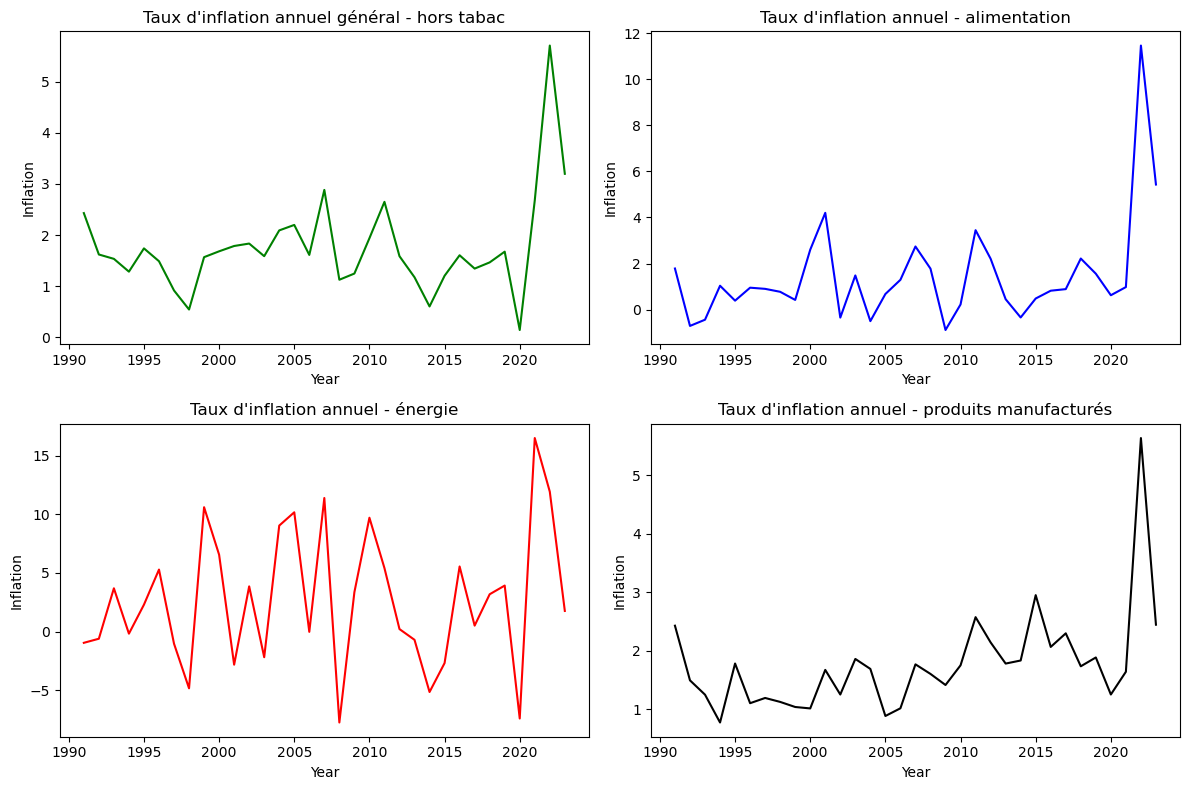

In [8]:
#Visualisation graphique de l'évolution des taux d'inflations annuels
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))
axes[0, 0].plot(IPC_df_annuelle["Year"], IPC_df_annuelle["Taux d'inflation hors tabac"], color = "green")
axes[0, 0].set_title("Taux d'inflation annuel général - hors tabac")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel('Inflation')

axes[0, 1].plot(IPC_df_annuelle["Year"], IPC_df_annuelle["Taux d'inflation alimentation"], color = "blue")
axes[0, 1].set_title("Taux d'inflation annuel - alimentation")
axes[0, 1].set_xlabel("Year")
axes[0, 1].set_ylabel('Inflation')

axes[1, 0].plot(IPC_df_annuelle["Year"], IPC_df_annuelle["Taux d'inflation énergie"], color = "red")
axes[1, 0].set_title("Taux d'inflation annuel - énergie")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel('Inflation')

axes[1, 1].plot(IPC_df_annuelle["Year"], IPC_df_annuelle["Taux d'inflation produits manufacturés"], color = "black")
axes[1, 1].set_title("Taux d'inflation annuel - produits manufacturés")
axes[1, 1].set_xlabel("Year")
axes[1, 1].set_ylabel('Inflation')

plt.tight_layout()
plt.show()

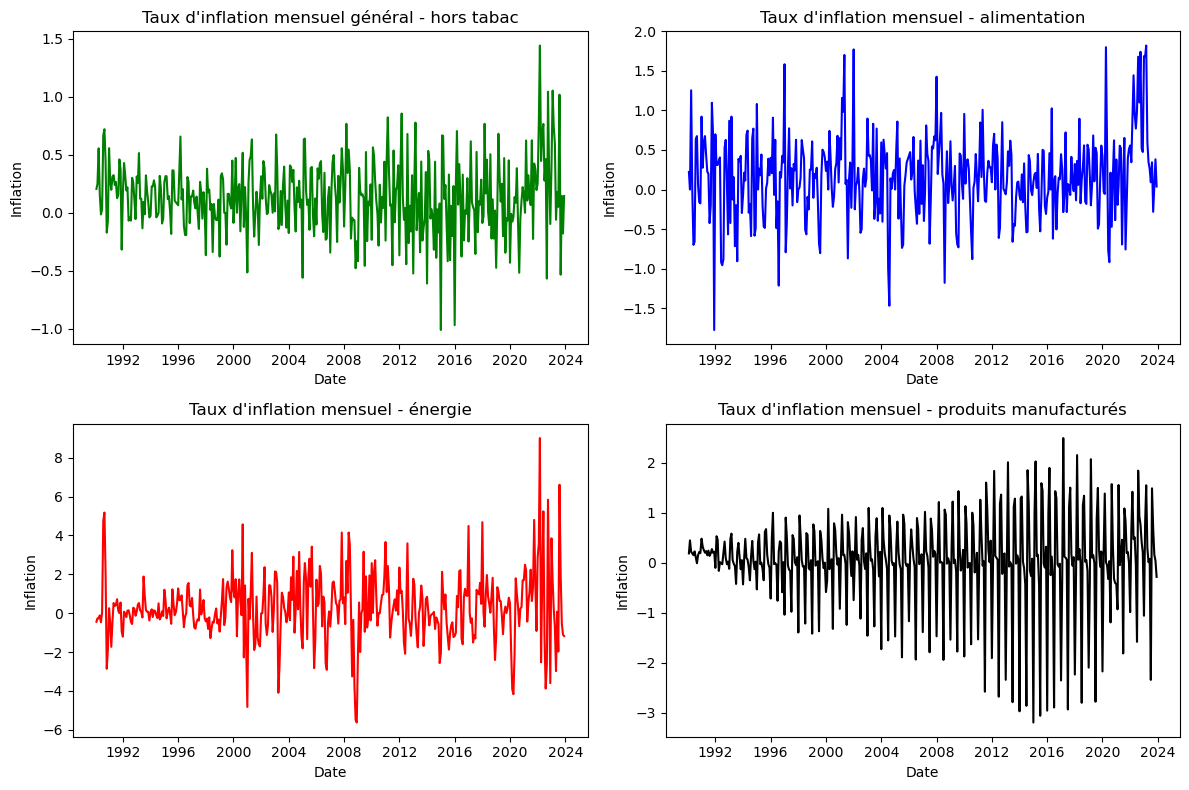

In [9]:
#Visualisation graphique de l'évolution des taux d'inflations mensuels
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))
axes[0, 0].plot(IPC_df_mensuelle["Date"], IPC_df_mensuelle["taux inflation mensuel hors tabac"], color = "green")
axes[0, 0].set_title("Taux d'inflation mensuel général - hors tabac")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel('Inflation')

axes[0, 1].plot(IPC_df_mensuelle["Date"], IPC_df_mensuelle["taux inflation mensuel alimentation"], color = "blue")
axes[0, 1].set_title("Taux d'inflation mensuel - alimentation")
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel('Inflation')

axes[1, 0].plot(IPC_df_mensuelle["Date"], IPC_df_mensuelle["taux inflation mensuel énergie"], color = "red")
axes[1, 0].set_title("Taux d'inflation mensuel - énergie")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel('Inflation')

axes[1, 1].plot(IPC_df_mensuelle["Date"], IPC_df_mensuelle["taux inflation mensuel produit manufacturés"], color = "black")
axes[1, 1].set_title("Taux d'inflation mensuel - produits manufacturés")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel('Inflation')

plt.tight_layout()
plt.show()

## Explication :
Ces graphiques représentent l'évolution annuelle et mensuelle de l'inflation hors tabac, alimentaire, énergétique et produits manufacturés en France du 01/01/1990 au 01/12/2023. On peut constater que l'inflation fluctue considérablement au fil du temps, présentant une certaine volatilité et une série de pics et de creux. Par exemple, autour de 2022, l'inflation a grimpé d’une façon significative. Cette hausse s'explique principalement par trois facteurs principaux. 

D'abord, la guerre en Ukraine a poussé à la hausse les prix de plusieurs matières premières, notamment le pétrole, le gaz, l'huile et le blé. Comme on peut voir sur les graphique l’inflation énergétique est la plus élevé par rapport aux autres, plus de 15% en 2022 ce qui est énorme et peu souhaitable par les états car l’énergie représente une grande partie des budgets et donc une augmentation assez significative peut être reflété et amortis que par la contribution des ménages et donc par une baisse de leur pouvoir d’achat. 

Ensuite, cet évènements a coïncidé avec la déclaration des pays de l’OPEP et leur décision de de baisser leur production du pétrole et de gaz, un événement qui est venu renforcé ce phénomène et que d’après nous a contribué à la hausse de l’inflation énergétique en France, surtout que le gazoduc north stream s’est arrêté d’approvisionner l’Europe en gaz, et que les pays qui sont à proximité de la France sont sous contrat avec d’autres pays, comme l’Algérie et l’Italie, chose qui a poussé la France à s’approvisionner en gaz loin de ses frontières et plus spécialement au Qatar et au états unis d’Amérique et au prix du marché  

Enfin, la dépréciation de l'euro a rendu les importations, particulièrement celles des énergies fossiles, plus coûteuses. 
En 2020, l’inflation est tombée en dessous de 0 %, ce qui indique une désinflation due au ralentissement économique pendant la pandémie. Ces tendances nous aident à comprendre comment la politique et l’économie sont étroitement liés et que les événements mondiaux ont une influence directe sur l’état d’un pays, sur sa stratégie commerciale internationale et sur sa stratégie monétaire. 


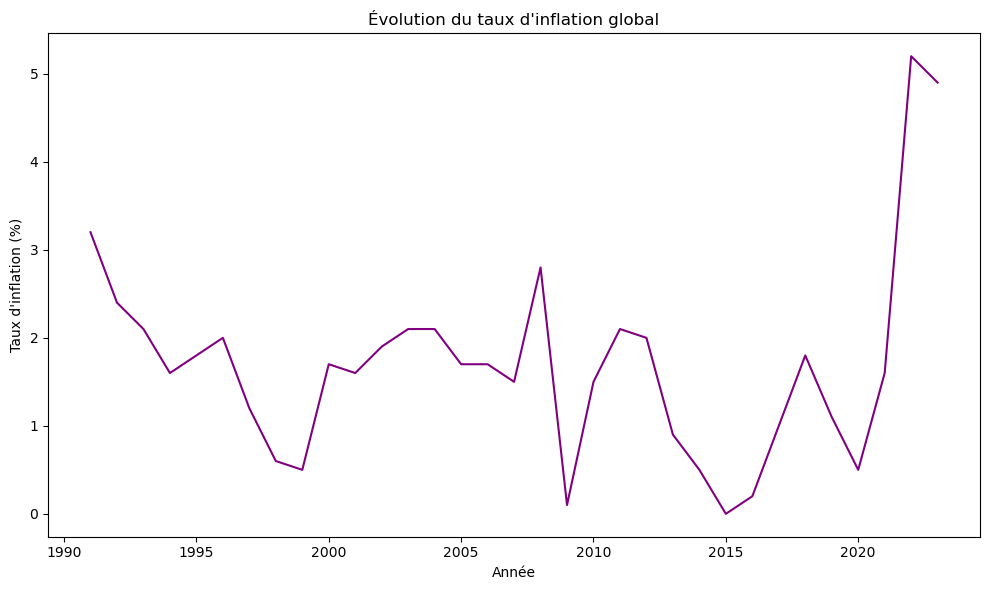

In [10]:
#Visualisation graphique de l'évolution des taux d'inflation global
df_5_sorted = df_5.sort_values(by = "date")
plt.figure(figsize = (10, 6))
plt.plot(df_5_sorted["date"], df_5_sorted["Taux d'inflation"], linestyle = '-', color="purple")
plt.title("Évolution du taux d'inflation global")
plt.xlabel("Année")
plt.ylabel("Taux d'inflation (%)")
plt.tight_layout()
plt.show()

## Explication : 
Ce graphique représente l'évolution annuelle de l'inflation globale. On peut observer une tendance à la baisse entre 1990 et au début des années 2000 d’environ 3,2% à 0,5%. Ce déclin peut s'expliquer par plusieurs facteurs comme la récession du début des années 1990 avec une faible demande, les innovations technologiques par l'augmentation de la productivité et la réduction des coûts de production, l'Accord de libre-échange nord-américain (ALENA) en 1994 et l'entrée de la Chine dans l'Organisation mondiale du commerce (OMC) en 2001 ont contribué à la chute des prix et à l'éclatement de la bulle Internet en 2000. 

On constate également une faible inflation entre 2011 et 2015 d’environ 2% à proche de 0%, influencée par les conséquences de la crise financière de 2008, la baisse des prix du pétrole entre 2014 et 2015, l'appréciation du dollar en rendant les importations moins chères et la diminution de la demande globale. 

En 2021, l’inflation a considérablement augmenté jusqu’à atteindre 5% en 2023. Ce phénomène peut s’expliquer par plusieurs facteurs comme ceux citer précédemment, mais aussi par des facteurs tels que les mesures de relance post-COVID-19, les perturbations de la chaîne d’approvisionnement et les variations des prix des biens et de services. 


## Partie 02 : Analyse des données :
La question qu’on sait poser lors de la visualisation de nos données, on s’est dit que peut-être il y’aurait une relation de causalité entre la hausse de l’inflation énergétique et celle de l’inflation alimentaire et l’inflation des produits manufacturés. Notre raisonnement était que l’augmentation des prix de l’énergie pourrait avoir un effet sur l’augmentation des prix des produits alimentaires et des produits manufacturés, car ces deux industries avaient besoin de l’énergie pour pouvoir produire. 
De fait, on a réalisé deux régressions linéaires pour essayer de déterminer une relation entre :
+ Mod1 : Y1 = a1X + b + erreur 
+ Mod2 : Y2 = a2X + b + erreur

Avec : 
+ Y1 = Taux d’inflation mensuel des produits alimentaires
+ Y2 = Taux d’inflation mensuel des produits manufacturés
+ X = Taux d’inflation mensuel de l’énergie
+ b = 1 


In [11]:
#Maintenat, essayons de voir s'il y a une realtion entre taux inflation mensuel alimentation et taux inflation mensuel énergie
IPC_df_mensuelle['constante'] = 1
X1 = IPC_df_mensuelle[['constante', 'taux inflation mensuel énergie']]
y1 = IPC_df_mensuelle['taux inflation mensuel alimentation']
model1 = sm.OLS(y1, X1)
results1 = model1.fit()
print(results1.summary())

                                     OLS Regression Results                                    
Dep. Variable:     taux inflation mensuel alimentation   R-squared:                       0.004
Model:                                             OLS   Adj. R-squared:                  0.002
Method:                                  Least Squares   F-statistic:                     1.735
Date:                                 Thu, 18 Apr 2024   Prob (F-statistic):              0.189
Time:                                         13:43:35   Log-Likelihood:                -312.78
No. Observations:                                  407   AIC:                             629.6
Df Residuals:                                      405   BIC:                             637.6
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                                     coe

C:\Users\DELL\AppData\Local\Temp\ipykernel_7720\2463966337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IPC_df_mensuelle['constante'] = 1


In [12]:
#Ensuite, essayons de voir s'il y a une realtion entre taux inflation mensuel produit manufacturés et taux inflation mensuel énergie
X = IPC_df_mensuelle[['constante', 'taux inflation mensuel énergie']]
y = IPC_df_mensuelle['taux inflation mensuel produit manufacturés']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                         OLS Regression Results                                        
Dep. Variable:     taux inflation mensuel produit manufacturés   R-squared:                       0.002
Model:                                                     OLS   Adj. R-squared:                 -0.001
Method:                                          Least Squares   F-statistic:                    0.7319
Date:                                         Thu, 18 Apr 2024   Prob (F-statistic):              0.393
Time:                                                 13:43:40   Log-Likelihood:                -542.05
No. Observations:                                          407   AIC:                             1088.
Df Residuals:                                              405   BIC:                             1096.
Df Model:                                                    1                                         
Covariance Type:                                     nonrobust  

## Explication : 
Les résultats suggèrent que les deux modèles ne sont pas significatifs, on peut voir que les R^2 ajustés sont très bas, ce qui implique que le taux d’inflation mensuelle n’explique pas assez les deux phénomènes étudiés. On peut voir aussi que a1 et a2 sont positives mais très bas aussi ce qui implique qu’il y a une légère relation entre l’inflation mensuelle énergétique et celle alimentaire et des produits manufacturés mais qui reste statistiquement non significative.

Malgré qu’on sache très bien qu’il n’y pas de relation directe entre causalité et corrélation, on a voulu visualiser la corrélation entre ces variables pour démontrer la non significativité des deux modèles. (En utilisant la bibliothèque seaborn).


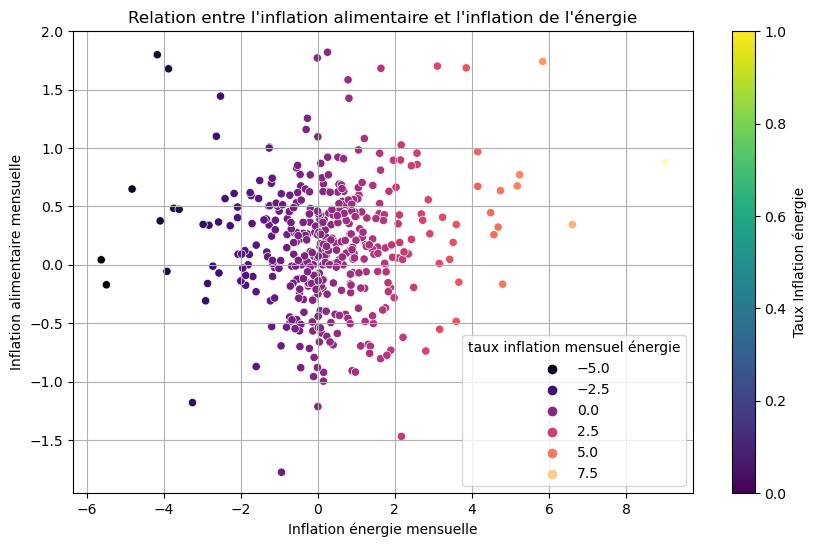

Corrélation entre l'inflation alimentaire et l'inflation de l'énergie: 0.06530847219651192


In [13]:
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(data = IPC_df_mensuelle, x = "taux inflation mensuel énergie", y = "taux inflation mensuel alimentation", hue = "taux inflation mensuel énergie", palette = "magma")
plt.title("Relation entre l'inflation alimentaire et l'inflation de l'énergie")
plt.xlabel("Inflation énergie mensuelle")
plt.ylabel("Inflation alimentaire mensuelle")
plt.grid(True)
plt.colorbar(scatterplot.get_children()[0], label = "Taux Inflation énergie")
plt.show()
#Calcul de la corrélation entre les deux variables
correlation = IPC_df_mensuelle["taux inflation mensuel énergie"].corr(IPC_df_mensuelle["taux inflation mensuel alimentation"])
print("Corrélation entre l'inflation alimentaire et l'inflation de l'énergie:", correlation)

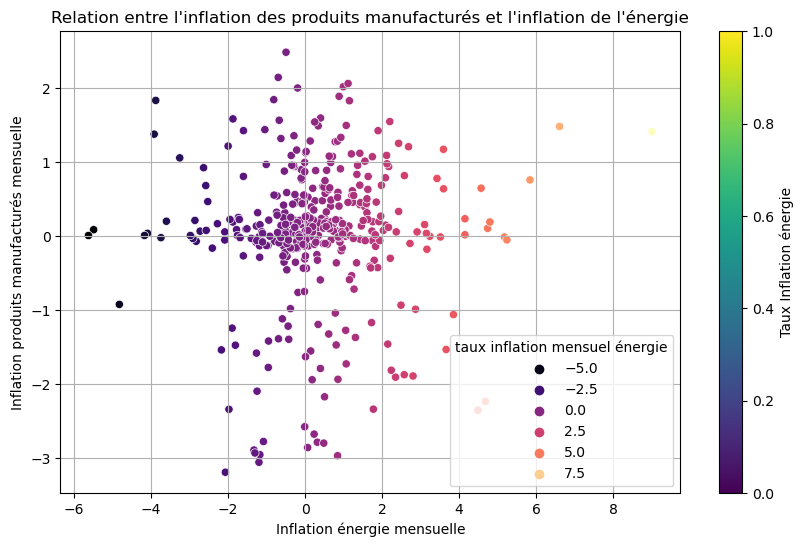

Corrélation entre l'inflation produits manufacturés et l'inflation de l'énergie: 0.04247144704431608


In [14]:
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(data = IPC_df_mensuelle, x = "taux inflation mensuel énergie", y = "taux inflation mensuel produit manufacturés", hue = "taux inflation mensuel énergie", palette = "magma")
plt.title("Relation entre l'inflation des produits manufacturés et l'inflation de l'énergie")
plt.xlabel("Inflation énergie mensuelle")
plt.ylabel("Inflation produits manufacturés mensuelle")
plt.grid(True)
plt.colorbar(scatterplot.get_children()[0], label = "Taux Inflation énergie")
plt.show()
#Calcul de la corrélation entre les deux variables
correlation = IPC_df_mensuelle["taux inflation mensuel énergie"].corr(IPC_df_mensuelle["taux inflation mensuel produit manufacturés"])
print("Corrélation entre l'inflation produits manufacturés et l'inflation de l'énergie:", correlation)

In [15]:
#Corrélation de spearman
from scipy.stats import spearmanr
correlation, p_value = spearmanr(IPC_df_mensuelle['taux inflation mensuel énergie'], IPC_df_mensuelle['taux inflation mensuel alimentation'])
print("Corrélation de rang de Spearman:", correlation)
print("P-value:", p_value)

Corrélation de rang de Spearman: 0.0514272705560869
P-value: 0.3006688198050383


In [16]:
#Corrélation de Kendall
from scipy.stats import kendalltau
correlation, p_value = kendalltau(IPC_df_mensuelle['taux inflation mensuel énergie'], IPC_df_mensuelle['taux inflation mensuel alimentation'])
print("Corrélation de rang de Kendall:", correlation)
print("P-value:", p_value)

Corrélation de rang de Kendall: 0.03324233896579869
P-value: 0.3166011279014256


## Explication :
D’après les graphiques et les calculs de corrélation qu’on a fait, on a trouver que la corrélation entre l’inflation alimentaire et l’inflation énergétique est de 6,53% et la corrélation entre l’inflation des produits manufacturés et l’inflation énergétique est de 4,24%, relation positive et plus forte entre l’alimentation et l’énergie par rapport aux produits manufacturés et l’énergie mais qu’il ne sont pas significatifs statistiquement ce qui prouvent aussi la non significativité des deux modèles. 

Ensuite, vu qu’il n’y avait pas de relation linéaire entre ces variables, on s’est dit que peut-être il y’aurait une relation non linéaire, c’est pour cela on a calculé la corrélation de Spearman et la corrélation de Kendall.

Ces taux de corrélation sont tous les deux non paramétrique (c’est-à-dire non basé sur des distributions sous-jacentes des données comme la loi normale) et on est tombé sur le même résultat avec un taux de corrélation très bas eu un p-value supérieure à 5%.

Et donc selon notre jeu de donnée, il n’y a pas de relation de causalité entre l’inflation énergétique et l’inflation alimentaire et celle des produits manufacturés. 

Maintenant, on a voulu voir l’impact de l’inflation mensuelle alimentaire, énergétique et celle des produits manufacturés sur l’inflation mensuelle globale hors tabac. De fait, on a réalisé une régression multiple en utilisant la bibliothèque statsmodels. Notre modèle est le suivant :
Mod3 : Y = a1X1 + a2X2 + a3X3 + b + erreur

Avec :
+ Y : Taux d’inflation mensuel hors tabac
+ X1 : Taux d’inflation mensuel de l’énergie
+ X2 : Taux d’inflation mensuel des produits alimentaires
+ X3 : Taux d’inflation mensuel des produits manufacturés
+ b = 1  

In [17]:
import statsmodels.api as sm
import pandas as pd
X = IPC_df_mensuelle[["taux inflation mensuel énergie", "taux inflation mensuel alimentation", "taux inflation mensuel produit manufacturés"]]  
y = IPC_df_mensuelle["taux inflation mensuel hors tabac"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     taux inflation mensuel hors tabac   R-squared:                       0.668
Model:                                           OLS   Adj. R-squared:                  0.665
Method:                                Least Squares   F-statistic:                     269.9
Date:                               Thu, 18 Apr 2024   Prob (F-statistic):           5.20e-96
Time:                                       13:43:57   Log-Likelihood:                 126.01
No. Observations:                                407   AIC:                            -244.0
Df Residuals:                                    403   BIC:                            -228.0
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                                                  coef    st

Les résultats suggèrent que notre modèle est significatif, on peut voir que le R^2 ajustés est égale à 66,8%, ce qui implique que nos trois variables indépendantes expliquent assez bien la variance de notre variable expliquée. On peut voir aussi que a1, a2 et a3 sont positives, ce qui démontre une relation positive entre nos variables. 

On remarque aussi que la F statistique est assez élevée avec une probabilité inférieure à 5%, ce qui confirme la significativité statistique de notre modèle 3. Les corrélations entre les variables indépendantes et la variable expliquée :

In [18]:
correlation_matrix = IPC_df_mensuelle.corr()
correlation_with_target = correlation_matrix["taux inflation mensuel hors tabac"]
print("Corrélations avec la variable expliquée (taux inflation mensuel hors tabac):")
print(correlation_with_target)

Corrélations avec la variable expliquée (taux inflation mensuel hors tabac):
Date                                           0.002535
taux inflation mensuel hors tabac              1.000000
taux inflation mensuel alimentation            0.354614
taux inflation mensuel énergie                 0.484693
taux inflation mensuel produit manufacturés    0.603466
constante                                           NaN
Name: taux inflation mensuel hors tabac, dtype: float64


On remarque que les corrélations sont positives, la corrélation entre l’inflation générale hors tabac et l’inflation des biens manufacturés est plus élevé par rapport aux autres variables indépendantes.

## Partie 03 : Application du modèle ARIMA :
Data frame utilisé : df_5 (taux d’inflation générale entre 1991 et 2023)

Vu qu’on travaille sur l’inflation, on sait très bien que l’inflation est une série temporelle dite non stationnaire (car elle présente des tendances qui changent au fur et à mesure que le temps passe (des pics et des creux), elle présente aussi une saisonnalité remarquable et une variance non constante). La figure 10 vient confirmer les deux premières conditions de la non stationnarité de la série temporelle de l’inflation annuelle globale, qui sont la variation des tendances et la présence d’une saisonnalité. La figure 11 vient confirmer la troisième condition, qui est la variation de la variance de la série.  La volatilité de la série peut être expliquer par les différents risques présents sur la scène internationale et leurs formes qui sont imprévisible.  


,date,Taux d'inflation,Année
0,2023,4.9,2023-01-01
1,2022,5.2,2022-01-01
2,2021,1.6,2021-01-01
3,2020,0.5,2020-01-01
4,2019,1.1,2019-01-01
5,2018,1.8,2018-01-01
6,2017,1.0,2017-01-01
7,2016,0.2,2016-01-01
8,2015,0.0,2015-01-01
9,2014,0.5,2014-01-01


,date,Taux d'inflation,Année
32,1991,3.2,1991-01-01
31,1992,2.4,1992-01-01
30,1993,2.1,1993-01-01
29,1994,1.6,1994-01-01
28,1995,1.8,1995-01-01
27,1996,2.0,1996-01-01
26,1997,1.2,1997-01-01
25,1998,0.6,1998-01-01
24,1999,0.5,1999-01-01
23,2000,1.7,2000-01-01


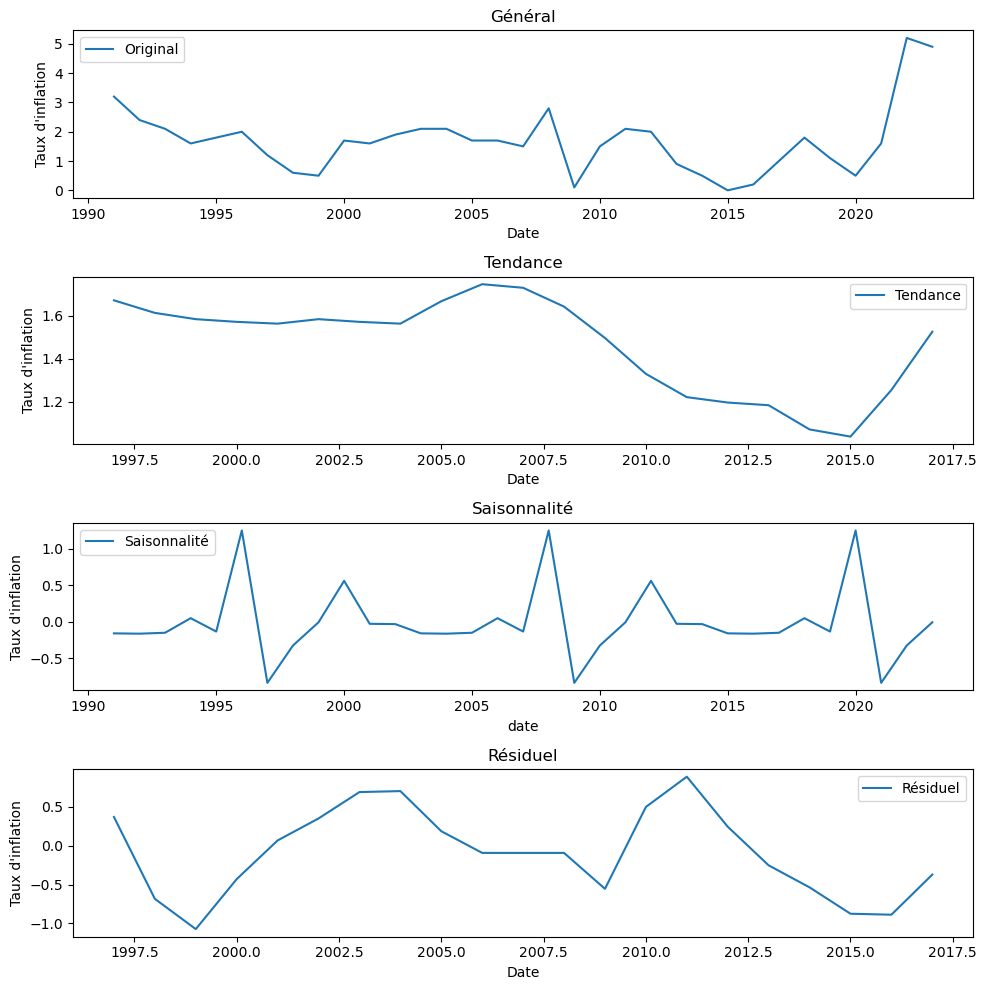

In [19]:
display(df_5)
df_5 = df_5.sort_values(by='date')
display(df_5)
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df_5["Taux d\'inflation"].dropna(), model = "additive", period = 12)
fig, ax = plt.subplots(4, 1, figsize = (10, 10))

ax[0].plot(df_5["date"], df_5["Taux d'inflation"].dropna(), label = "Original")
ax[0].set_title("Général")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Taux d'inflation")
ax[0].legend()

ax[1].plot(df_5["date"], decompose_result.trend, label = "Tendance")
ax[1].set_title("Tendance")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Taux d'inflation")
ax[1].legend()

ax[2].plot(df_5["date"], decompose_result.seasonal, label = "Saisonnalité")
ax[2].set_title("Saisonnalité")
ax[2].set_xlabel("date")
ax[2].set_ylabel("Taux d'inflation")
ax[2].legend()

ax[3].plot(df_5["date"], decompose_result.resid, label = "Résiduel")
ax[3].set_title("Résiduel")
ax[3].set_xlabel("Date")
ax[3].set_ylabel("Taux d'inflation")
ax[3].legend()

plt.tight_layout()
plt.show()

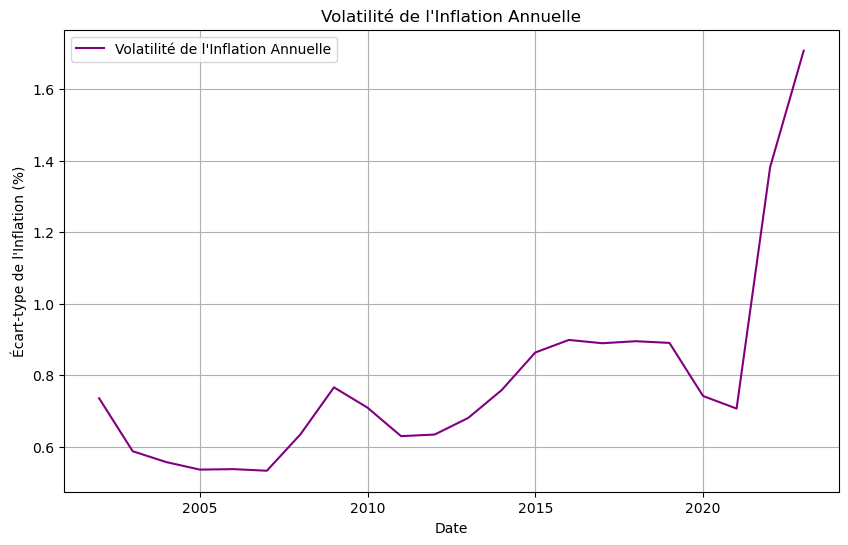

In [20]:
df_5["Inflation_Annuelle_Volatilite"] = df_5["Taux d\'inflation"].rolling(window = 12).std()
plt.figure(figsize=(10, 6))
plt.plot(df_5["date"], df_5["Inflation_Annuelle_Volatilite"], label = "Volatilité de l\'Inflation Annuelle", color = "purple")
plt.title("Volatilité de l\'Inflation Annuelle")
plt.xlabel("Date")
plt.ylabel('Écart-type de l\'Inflation (%)')
plt.legend()
plt.grid(True)
plt.show()

Et pour cela, on a décidé d’utiliser le modèle ARIMA, qui est un modèle d’analyse et de prédiction statistique basé sur l’apprentissage (le Machine Learning), Ce modèle viendra corriger notre série et la rendre stationnaire avant d’appliquer le modèle ARMA afin de la modéliser et de prédire le taux d’inflation annuelle pour l’année 2024.

## 1-	Analyse de la série temporelle :
Dans cette partie, on a décidé d’analyser l’évolution de l’inflation annuelle globale par rapport au modèle ARIMA, pour cela on prit 60% des donnée de df_5 pour entrainer le modèle et 40% pour le tester. Le résultat est le suivant :


c:\Users\DELL\Anaconda_jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\Anaconda_jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\Anaconda_jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\Anaconda_jupyter\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\Anaconda_jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No suppo

RMSE: 1.6632253172327238


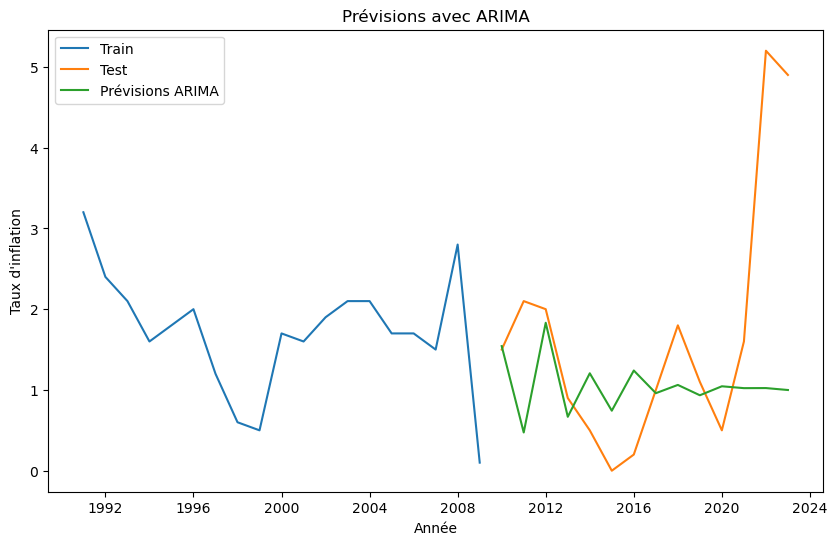

In [21]:
#Modèle ARIMA 
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
taille_entrainement = int(len(df_5) * 0.6)
train_data = df_5[:taille_entrainement]
test_data = df_5[taille_entrainement:]
model = ARIMA(train_data["Taux d'inflation"], order=(5,1,0))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test_data))
erreur_mse = mean_squared_error(test_data["Taux d'inflation"], predictions)
rmse = np.sqrt(erreur_mse)
print(f"RMSE: {rmse}")
plt.figure(figsize=(10, 6))
plt.plot(train_data["Année"], train_data["Taux d'inflation"], label = "Train")
plt.plot(test_data["Année"], test_data["Taux d'inflation"], label = "Test")
plt.plot(test_data["Année"], predictions, label = "Prévisions ARIMA")
plt.title('Prévisions avec ARIMA')
plt.xlabel("Année")
plt.ylabel("Taux d'inflation")
plt.legend()
plt.show()

## Explication : 
Ce qu’on remarque est qu’il y a une différence flagrante entre les valeurs réelles de l’inflation et les valeurs prédites par le modèle, il y a plusieurs explications possibles à ce résultat.
D’abord, le nombre d’observation qui est insuffisant pour avoir une estimation plus ajustée. 

En plus, le modèle ne prend en compte qu’une seule variable explicative.

Ensuite, l’inflation est reliée à des évènements imprévisibles et des politiques économiques qui peuvent varier et changer d’année en année. Prenons l’exemple de 2022, le modèle prédit que le taux d’inflation soit d’environ 1%, mais réellement l’inflation a dépassé les 5% à cause de la guerre en Ukraine, événement que aucun modèle peut prévoir.
Enfin, l’erreur quadratique moyenne est égale à 1,66 qui assez élevé, qui indique que notre modèle appliqué sur l’inflation manque de précision.


## 2-	Prédiction pour 2024 :
Afin de prédire le taux d’inflation en France pour l’année 2024, on a appliqué la même méthode d’apprentissage sauf que on a utilisé toutes les données pour entrainer le modèle (training dataset = 100%).



In [22]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_5["Taux d'inflation"], order=(5,1,0))
model_fit = model.fit()
predictions_2024 = model_fit.forecast(steps=1) 
print(predictions_2024)

33    3.543381
dtype: float64


c:\Users\DELL\Anaconda_jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\Anaconda_jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\Anaconda_jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\DELL\Anaconda_jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\DELL\Anaconda_jupyter\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is

## Explication : 
Le modèle ARIMA a prédit que le taux d’inflation 2024 sera d’environ 3,54%, résultat qu’on trouve disons plus cohérent que les résultats précédents, vu qu’on a augmenté les données d’entrainement, mais malgré ça, on trouve qu’il reste assez loin de la réalité vu la conjoncture internationale actuelle, on peut citer : la guerre à Gaza, l’attaque de l’Iran sur Israël, la fermeture du Golfe d’Aden par les Houthis et la flambé des couts de transport.
On estime que le taux d’inflation va avoir probablement une tendance haussière ou une stagnation malgré les politiques mises en place par le gouvernement.


# Partie 04 : Comparaison des indices de prix à la consommation harmonisé de plusieurs pays entre janvier 2019 et décembre 2023 :

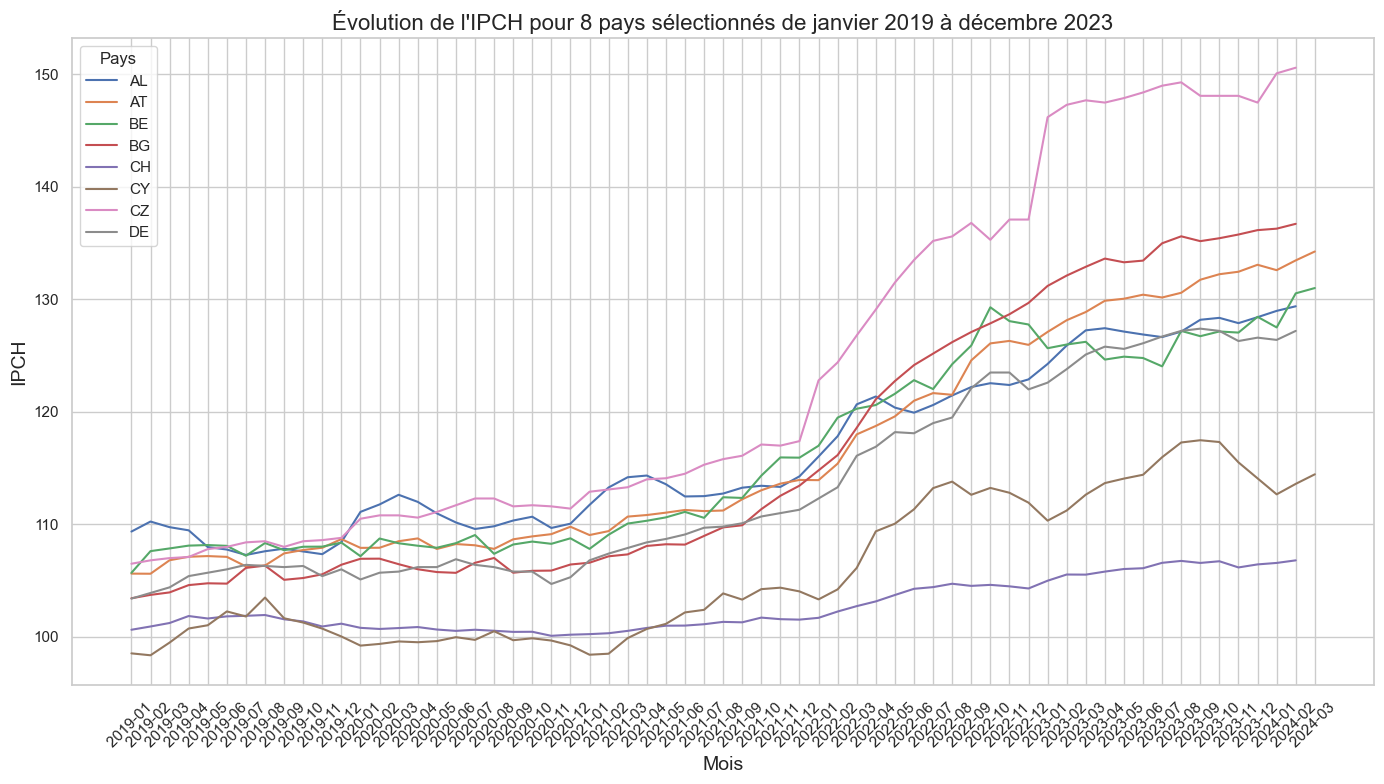

In [23]:
data_clean = df_6.copy()
for column in df_6.columns[1:]:
    data_clean[column] = df_6[column].str.extract('(\d+\.\d+|\d+)').astype(float)
data_clean['mean'] = data_clean.iloc[:, 1:].mean(axis=1, skipna=True)
data_clean[['freq', 'unit', 'coicop', 'geo']] = data_clean['freq,unit,coicop,geo\\TIME_PERIOD'].str.split(',', expand=True)
data_clean.drop(columns=['freq,unit,coicop,geo\\TIME_PERIOD'], inplace=True)
moyenne_mensuelle = data_clean.iloc[:, :-4].mean().rename('Average IPC')
sns.set(style="whitegrid")
selected_countries = data_clean['geo'].unique()[:8]
plt.figure(figsize=(14, 8))
for geo in selected_countries:
    country_data = data_clean[data_clean['geo'] == geo]
    sns.lineplot(x=country_data.columns[:-5], y=country_data.iloc[0, :-5], label=geo)

plt.title('Évolution de l\'IPCH pour 8 pays sélectionnés de janvier 2019 à décembre 2023', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('IPCH', fontsize=14)
plt.legend(title='Pays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion : 
Les banques centrales de la zone euro opèrent dans la surveillance de l’inflation, en mettent en œuvre des politiques monétaires, en ajustant les taux d’intérêts, et en maintenant un taux d’inflation à 2%. L’inflation reste très complexe car il est difficile de déterminer la principale raison des fluctuations des prix, car d'autres facteurs tels que les variations des coûts, les chocs de l'offre et de la demande, la quantité de monnaie en circulation, les changements politiques, les crises économiques, les conditions de concurrence jouent tous un rôle dans la hausse ou la baisse des prix.

Les graphiques que nous avons créés avec les données nous permettent de comprendre les liens entre les changements économiques et d’identifier les facteurs dans les tendances générales. Cependant, notre analyse de l’inflation reste limitée, ce qui nécessite des données supplémentaires pour approfondir nos réflexions.
